# CSC2042S Machine Learning @ UCT
# Supervised Learning 

**Author: Buqwana Xolisile**

This notebook implements the binary classfier to a multi-class classfication using the one vs rest classfication. The notebook begins by loading the simpsons-mnist-master dataset using the **Loader** class and it performs data preprocessing on the dataset, including steps like normalization and splitting it into training and testing sets.

## Imports, Installations, and Downloads

This notebook will make extensive use of some standard Python libraries for scientific computing, namely:
* ``numpy`` for storing and manipulating arrays/matrices of numerical data.
* ``matplotlib`` for displaying image data.
* ``PIL (Image)`` for opening and processing images.
* ``random`` for generating random numbers and shuffling data.
* ``os`` for interacting with files and directories.
* ``struct`` for handling binary data formats.

In [1]:
%matplotlib inline
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import random
import os
import struct

<a id='section1'></a>
# 1. Data processing

We will now load the `Simpsons-MNIST` which is a small dataset of The Simpsons characters consisting of a training set of 8,000 examples
and a test set of 2,000 examples. Each example is a 28x28 RGB/grayscale image, associated with a label from 10 classes.
This dataset is available in both formats, RGB and grayscale available at: [MNIST](https://github.com/google/n-digit-mnist)
We use the defined class below **Loader** which has the following functions which works as follows:

The **load_images_from_directory** function takes a folder containing subfolders for each character, and each subfolder is assigned a numeric label according to the label_map. It then goes through all the JPEG images in each subfolder, loads them using PIL, and converts them into NumPy arrays. For every image, the corresponding label of its folder is also stored. Finally, the function returns two NumPy arrays: one containing all the images and one containing their associated labels.Also the **normalize_images** function which converts image pixel values to floating-point numbers and scales them to a range between 0 and 1.

**flatten_images** this function flattens each image into a 1D vector by reshaping the array from (n_samples, height, width) or (n_samples, height, width, channels) to (n_samples, features) for perceptron modeling,then the **split_train_validation function** takes the training data and splits it into training and validation sets. It randomly shuffles the data, selects a 20% portion for validation, and keeps the rest for training then returns both the new training set and the validation set.

Finally **load_rgb_data** and **load_grayscale_data** functions that will mainly act as wrappers that call earlier helper functions that handle the process of loading images, splitting them into training and validation sets, normalizing pixel values, and flattening them into vectors in which they return clean datasets.

Data preprocessing in progress......
Grayscale - Training: (6000, 784), Validation: (2000, 784), Test: (2000, 784)
RGB -  Training:  (6000, 2352), Validation: (2000, 2352), Test: (2000, 2352)
Data loading completed successfully!


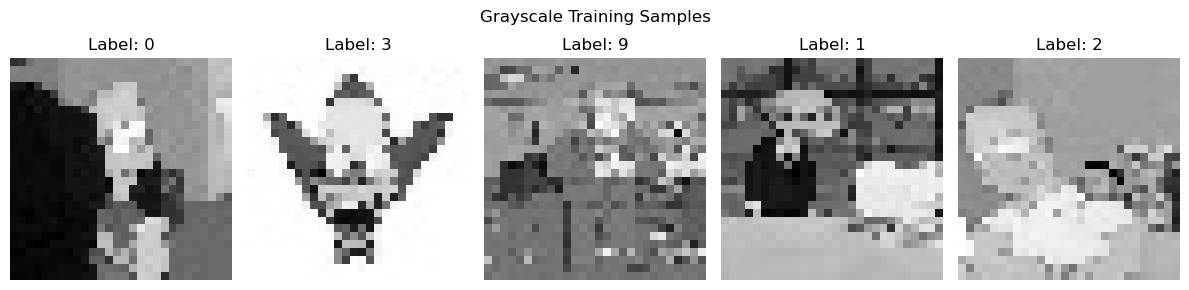

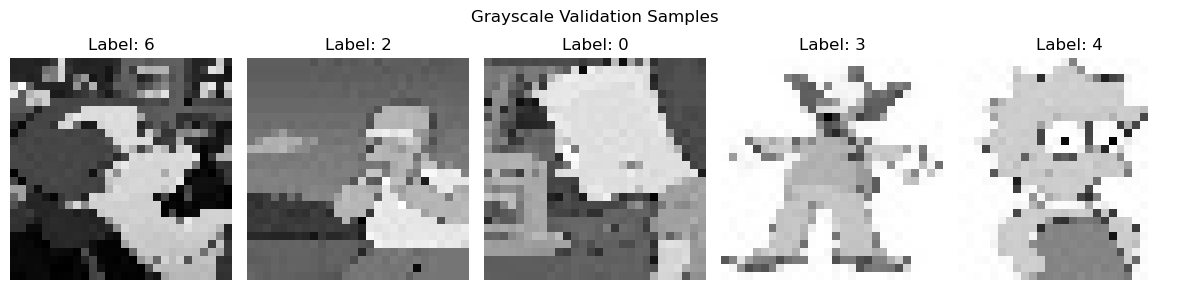

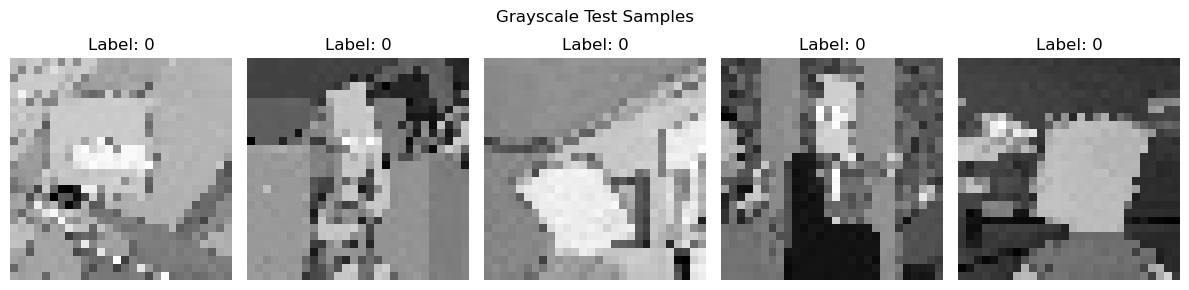

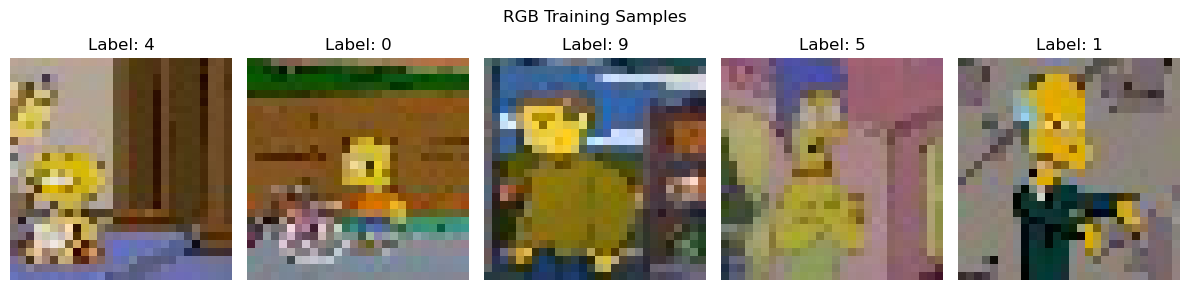

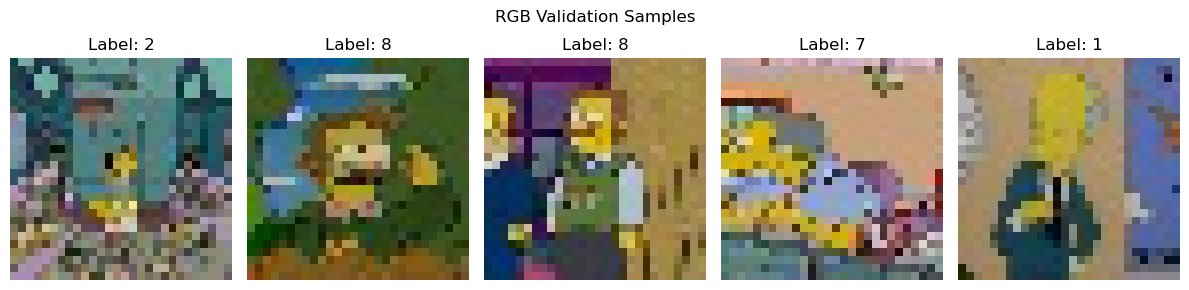

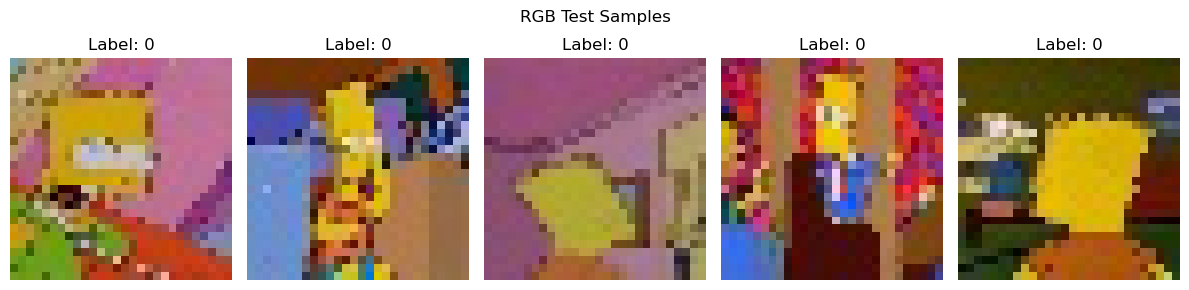

In [15]:
class Loader:
    """
    Simpsons-MNIST JPEG Image Loader
    Loads images from 'simpsons-mnist-master/dataset/grayscale' and 'simpsons-mnist-master/dataset/rgb'
    directories containing 'test' and 'train' folders with JPEG files.
    """
    
    def __init__(self, base_dir='simpsons-mnist-master/dataset'):
        self.base_dir = base_dir
        self.grayscale_dir = os.path.join(base_dir, 'grayscale')
        self.rgb_dir = os.path.join(base_dir, 'rgb')
        
    def load_images_from_directory(self, directory_path):
        """Load all JPEG images from a directory and return as numpy array"""
        images = []
        labels = []
        label_map = {
            "bart_simpson": 0,
            "charles_montgomery_burns": 1,
            "homer_simpson": 2,
            "krusty_the_clown": 3,
            "lisa_simpson": 4,
            "marge_simpson": 5,
            "milhouse_van_houten": 6,
            "moe_szyslak": 7,
            "ned_flanders": 8, 
            "principal_skinner": 9
        }
        
        character_folders = [f for f in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, f))]  # Get all character folders 
        for folder_name in character_folders:
            label = label_map[folder_name]
            
            folder_path = os.path.join(directory_path, folder_name)
            image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg'))]  # Get all JPEG files in this character folder
    
            for filename in image_files:
                file_path = os.path.join(folder_path, filename)
                with Image.open(file_path) as img: # Load image using PIL
                    img_array = np.array(img) # Convert to numpy array
                    images.append(img_array)
                    labels.append(label)
        return np.array(images), np.array(labels)
        
    def normalize_images(self, images):
        """Normalize images to [0,1] range"""
        return images.astype(np.float32) / 255.0
        
    def flatten_images(self, images):
        """Flatten images into vectors for perceptron modeling."""
        n_samples = images.shape[0]
        return images.reshape(n_samples, -1)

    def split_train_validation(self, X_train, y_train, validation_ratio=0.25):
        """Split training data into training and validation sets"""
        n_samples = len(X_train)
        n_validation = int(n_samples * validation_ratio)
    
        indices = np.random.permutation(n_samples)  # Create random indices for splitting
        val_indices = indices[:n_validation]
        train_indices = indices[n_validation:]
        
        X_valid = X_train[val_indices]
        y_valid = y_train[val_indices]
        X_train_split = X_train[train_indices]
        y_train_split = y_train[train_indices]
        
        return (X_train_split, y_train_split), (X_valid, y_valid)

    def load_grayscale_data(self):
        """Load and process grayscale MNIST data"""
        train_dir = os.path.join(self.grayscale_dir, 'train')
        test_dir = os.path.join(self.grayscale_dir, 'test')
        
        X_train_raw, y_train = self.load_images_from_directory(train_dir) # Load training 
        X_test_raw, y_test = self.load_images_from_directory(test_dir) # Load Test data
        
        (X_train_raw, y_train), (X_val_raw, y_valid) = self.split_train_validation(X_train_raw, y_train)  # Split training data into train and validation

        X_train_raw = self.normalize_images(X_train_raw)
        X_val_raw = self.normalize_images(X_val_raw)
        X_test_raw = self.normalize_images(X_test_raw)
        
        X_train = self.flatten_images(X_train_raw)
        X_valid = self.flatten_images(X_val_raw)
        X_test = self.flatten_images(X_test_raw)
        
        return (X_train, y_train), ( X_valid, y_valid), (X_test, y_test)
    
    def load_rgb_data(self):
        """Load and process RGB MNIST data"""
        train_dir = os.path.join(self.rgb_dir, 'train')
        test_dir = os.path.join(self.rgb_dir, 'test')
        
        X_train_raw, y_train = self.load_images_from_directory(train_dir)  # Load training
        X_test_raw, y_test = self.load_images_from_directory(test_dir)  # Test data
        
        (X_train_raw, y_train), (X_val_raw, y_valid) = self.split_train_validation(X_train_raw, y_train)  # Split training data into train and validation

        X_train_raw = self.normalize_images(X_train_raw)
        X_val_raw = self.normalize_images(X_val_raw)
        X_test_raw = self.normalize_images(X_test_raw)
        
        X_train = self.flatten_images(X_train_raw)
        X_valid = self.flatten_images(X_val_raw)
        X_test = self.flatten_images(X_test_raw)
        
        return (X_train, y_train), (X_valid, y_valid), (X_test, y_test)
    
    def load_all_data(self):
        """Load both grayscale and RGB data"""
        grayscale_data = self.load_grayscale_data()
        rgb_data = self.load_rgb_data() 
        return {
            'grayscale': {
                'train': grayscale_data[0],
                'validation': grayscale_data[1],
                'test': grayscale_data[2]
            },
            'rgb': {
                'train': rgb_data[0],
                'validation': rgb_data[1],
                'test': rgb_data[2]
            }
        }
    
    def visualize_sample(self, images, labels, n_samples=5, title="Sample Images"):
        """Visualize sample images"""
        fig, axes = plt.subplots(1, n_samples, figsize=(12, 3))
        for i in range(n_samples):
            if images.shape[1] == 784:  # Grayscale
                    img = images[i].reshape(28, 28)
                    axes[i].imshow(img, cmap='gray')
            elif images.shape[1] == 2352:  # RGB (28x28x3)
                    img = images[i].reshape(28, 28, 3)
                    axes[i].imshow(img)
            axes[i].set_title(f'Label: {labels[i]}')
            axes[i].axis('off')
            
        plt.suptitle(title)
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    loader = Loader('simpsons-mnist-master/dataset') # Initialize the loader class.
    try:
        print("Data preprocessing in progress......") 
        all_data = loader.load_all_data()
        grayscale_train = all_data['grayscale']['train']
        grayscale_val = all_data['grayscale']['validation']
        grayscale_test = all_data['grayscale']['test']
        
        rgb_train = all_data['rgb']['train']
        rgb_val = all_data['rgb']['validation']
        rgb_test = all_data['rgb']['test']
        
        print(f"Grayscale - Training: {grayscale_train[0].shape}, Validation: {grayscale_val[0].shape}, Test: {grayscale_test[0].shape}")
        print(f"RGB -  Training:  {rgb_train[0].shape}, Validation: {rgb_val[0].shape}, Test: {rgb_test[0].shape}")
        print("Data loading completed successfully!")
        
        # Visualize some samples 
        loader.visualize_sample(grayscale_train[0][:5], grayscale_train[1][:5], title="Grayscale Training Samples")  
        loader.visualize_sample(grayscale_val[0][:5], grayscale_val[1][:5], title="Grayscale Validation Samples")  
        loader.visualize_sample(grayscale_test[0][:5], grayscale_test[1][:5], title="Grayscale Test Samples")  
       
        loader.visualize_sample(rgb_train[0][:5], rgb_train[1][:5], title="RGB Training Samples")  
        loader.visualize_sample(rgb_val[0][:5], rgb_val[1][:5], title="RGB Validation Samples")   
        loader.visualize_sample(rgb_test[0][:5], rgb_test[1][:5], title="RGB Test Samples")  
        
    except FileNotFoundError as e:
        print(f"Error: Could not find directory. Please ensure the directory structure exists:")
    except Exception as e:
        print(f"Error loading data: {e}")
        

<a id='section2'></a>
# 2. Binary Perceptron
This class implements a perceptron that outputs either 0 or 1, depending on whether the weighted sum of inputs plus a bias is greater than or equal to zero.  

To make a prediction, the **predict(x)** method calculates the weighted sum of the input features and applies the **step_function(y)**, which returns 1 if the value is non-negative and 0 otherwise.  

The **apply_learning_rule(x, y)** method updates the weights and bias using the perceptron learning rule, adjusting them based on the error between the true label and the predicted label for a single input.  

When the perceptron is created, its weights are initialized to small random values and the bias is set to zero.  


In [30]:
import numpy as np

class BinaryPerceptron:
    """
    Binary Perceptron classifier implementing the perceptron learning rule.
    Predicts binary labels (0 or 1) using a linear decision boundary.
    """
    
    def __init__(self, num_of_features, alpha=0.01):
        """Initialize the Binary Perceptron."""
        self.alpha = alpha
        np.random.seed(42)
        self.weights = np.random.normal(0, 0.01, num_of_features)
        self.bias = 0.0
        
    def predict(self, x): 
        """Predict 0 or 1 depending on whether weighted sum >= 0."""  
        return np.where(np.dot(x, self.weights) + self.bias >= 0, 1, 0)
        
    def weighted_sum(self, y):
        """Returns weighted sum."""
        return np.dot(x, self.weights) + self.bias
        
    def apply_learning_rule(self, x, y):
        """
        Update weights and bias using the perceptron learning rule:
          w_i <- w_i + α (y - g(x)) x_i
          b   <- b   + α (y - g(x))
        """
        y_hat = self.predict(x)
        error = y - y_hat
        self.weights = self.weights + self.alpha * error * x
        self.bias = self.bias + self.alpha * error
 
    def __repr__(self):
        return f"BinaryPerceptron(weights={self.weights}, bias={self.bias:.3f}, alpha={self.alpha})"

<a id='section2.1'></a>
# Multi-class perceptron
While a binary perceptron can only decide between two outcomes, the multi-class version expands this idea to ten possible labels. It does this by keeping a small team of perceptrons, one dedicated to each class. This is known as the One-vs-Rest strategy. 

Whenever a new input arrives, every perceptron in the team gives it a score using the **weight_sum(x)** method from the BinaryPerceptron. The class linked to the perceptron with the highest score is taken as the final answer by the **predict(x)** method.  

In [31]:
class MultiClassPerceptron(BinaryPerceptron):
    """
    Multi-class Perceptron using One-vs-Rest strategy.
    Extends BinaryPerceptron by maintaining one BinaryPerceptron per class.
    """

    def __init__(self, num_of_features, alpha=0.01):
        self.perceptrons = [
            BinaryPerceptron(num_of_features, alpha) for _ in range(10)
        ]

    def predict(self, x):
        """
        Predict class label for input x.
        Selects the class with the highest raw score
        from all underlying BinaryPerceptrons.
        """
        scores = [p.weighted_sum(x) for p in self.perceptrons]
        return np.argmax(scores)

<a id='section3'></a>
# 3. Training

In [ ]:
class PerceptronTrainer:
    """
    Trainer class for Binary Perceptron.
    Handles training with shuffling, multiple stopping criteria, and optional validation monitoring.
    """

    def __init__(self, perceptron, X_train, y_train, X_val=None, y_val=None):
        """
        Initialize trainer.

        perceptron: BinaryPerceptron instance
        X_train, y_train: Training data
        X_validation, y_validation: Optional validation data for early stopping
        """
        self.perceptron = perceptron
        self.x_train = x_train
        self.y_train = y_train
        self.x_validation = x_validtion
        self.y_validation = y_validation

    def shuffle_data(self, x, y):
        """Return shuffled copies of X and y"""
        indices = np.random.permutation(len(x))
        return x[indices], y[indices]

    def compute_accuracy(self, X, y):
        """Compute accuracy for given data"""
        y_pred = self.perceptron.predict(X)
        return np.mean(y_pred == y)

    def train(self, max_epochs=50, early_stopping=False, patience=5):
        """
        Train perceptron with optional early stopping.

        max_epochs: maximum number of epochs to train
        early_stopping: monitor validation accuracy to stop early
        patience: epochs to wait for improvement before stopping
        """
        best_val_acc = 0.0
        epochs_no_improve = 0

        for epoch in range(max_epochs):
            X_shuffled, y_shuffled = self.shuffle_data(self.X_train, self.y_train)

            # Update weights one sample at a time
            for x, y in zip(X_shuffled, y_shuffled):
                self.perceptron.apply_learning_rule(x, y)

            # Compute training accuracy
            train_acc = self.compute_accuracy(self.X_train, self.y_train)

            # Optional: early stopping on validation set
            if self.X_val is not None and self.y_val is not None:
                val_acc = self.compute_accuracy(self.X_val, self.y_val)

                if early_stopping:
                    if val_acc > best_val_acc:
                        best_val_acc = val_acc
                        epochs_no_improve = 0
                    else:
                        epochs_no_improve += 1

                    if epochs_no_improve >= patience:
                        print(f"Early stopping at epoch {epoch+1}, validation accuracy did not improve.")
                        break

                print(f"Epoch {epoch+1}/{max_epochs} - Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")
            else:
                print(f"Epoch {epoch+1}/{max_epochs} - Train Acc: {train_acc:.4f}")

        print("Training complete.")
        return self.perceptron


In [34]:
if __name__ == "__main__":
    loader = Loader('simpsons-mnist-master/dataset') # Initialize the loader class.
    try:
        print("Data preprocessing in progress......") 
        all_data = loader.load_all_data()
        grayscale_train = all_data['grayscale']['train']
        grayscale_val = all_data['grayscale']['validation']
        grayscale_test = all_data['grayscale']['test']
        
        rgb_train = all_data['rgb']['train']
        rgb_val = all_data['rgb']['validation']
        rgb_test = all_data['rgb']['test']

        print(f"Grayscale - Training: {grayscale_train[0].shape}, Validation: {grayscale_val[0].shape}, Test: {grayscale_test[0].shape}")
        print(f"RGB -  Training:  {rgb_train[0].shape}, Validation: {rgb_val[0].shape}, Test: {rgb_test[0].shape}")
        print("Data loading completed successfully!")

        binaryPerceptron = BinaryPerceptron(learning_rate=0.01, max_epochs=100)
        
        # Get grayscale data
        X_train, y_train = all_data['grayscale']['train']
        X_val, y_val = all_data['grayscale']['validation']
        X_test, y_test = all_data['grayscale']['test']
        
        
        print(f"Training set: {X_train.shape[0]} samples")
        print(f"Validation set: {X_val.shape[0]} samples")
        print(f"Test set: {X_test.shape[0]} samples")
        
        # Example: Binary classification (class 0 vs all others)
        print("\n--- Binary Perceptron Example ---")
        binary_y_train = np.where(y_train == 0, 1, 0)  # 1 for Bart Simpson, 0 for others
        binary_y_val = np.where(y_val == 0, 1, 0)
        
        binary_perceptron = BinaryPerceptron(learning_rate=0.01, max_epochs=100)
        binary_perceptron.fit(X_train, binary_y_train)
        
        binary_pred = binary_perceptron.predict(X_val)
        binary_accuracy = calculate_accuracy(binary_y_val, binary_pred)
        print(f"Binary Perceptron Validation Accuracy: {binary_accuracy:.3f}")
        
        # Multi-class classification
        print("\n--- Multi-class Perceptron Example ---")
        multi_perceptron = MultiClassPerceptron(learning_rate=0.01, max_epochs=100)
        multi_perceptron.fit(X_train, y_train)
        
        multi_pred = multi_perceptron.predict(X_val)
        multi_accuracy = calculate_accuracy(y_val, multi_pred)
        print(f"Multi-class Perceptron Validation Accuracy: {multi_accuracy:.3f}")
        
        # Show class distribution in predictions
        unique, counts = np.unique(multi_pred, return_counts=True)
        print(f"Predicted class distribution: {dict(zip(unique, counts))}")
        
    except Exception as e:
        print(f"Error: {e}")
        print("Please ensure the Loader class and data directory are available.")

_IncompleteInputError: incomplete input (3968347535.py, line 16)